# [Leetcode322-零钱兑换](https://leetcode.cn/problems/coin-change/)

给定不同面额的硬币 coins 和一个总金额 amount。编写一个函数来计算可以凑成总金额所需的最少的硬币个数。如果没有任何一种硬币组合能组成总金额，返回 -1。
你可以认为每种硬币的数量是无限的。

示例 1：
- 输入：coins = [1, 2, 5], amount = 11
- 输出：3
- 解释：11 = 5 + 5 + 1

示例 2：
- 输入：coins = [2], amount = 3
- 输出：-1

示例 3：
- 输入：coins = [1], amount = 0
- 输出：0

示例 4：
- 输入：coins = [1], amount = 1
- 输出：1

示例 5：
- 输入：coins = [1], amount = 2
- 输出：2

提示：
- 1 <= coins.length <= 12
- 1 <= coins[i] <= 2^31 - 1
- 0 <= amount <= 10^4

In [4]:
from typing import List

class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        dp = [2 ** 64 - 1] * (amount + 1)
        dp[0] = 0
        for coin in coins:
            for j in range(1, amount + 1):
                dp[j] = min(dp[j], dp[j - coin] + 1)

        if dp[amount] == 2 ** 64 - 1:
            return -1
        print(dp)
        return dp[amount]
    
if __name__ == "__main__":
    solution = Solution()
    solution.coinChange([1, 2, 5], 11)

[0, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2, 3]


# [Leetcode279-完全平方数](https://leetcode.cn/problems/perfect-squares/)

给你一个整数 n ，返回和为 n 的完全平方数的最少数量 。
完全平方数是一个整数，其值等于另一个整数的平方；换句话说，其值等于一个整数自乘的积。例如，1、4、9 和 16 都是完全平方数，而 3 和 11 不是。

示例 1： 
- 输入：n = 12 
- 输出：3   
- 解释：12 = 4 + 4 + 4 

示例 2： 
- 输入：n = 13 
- 输出：2 
- 解释：13 = 4 + 9 

提示： 
1 <= n <= 10 ^ 4

In [5]:
class Solution:
    def numSquares(self, n: int) -> int:
        dp = [2 ** 64 - 1] * (n + 1)
        dp[0] = 0
        for i in range(1, n + 1):
            for j in range(1, int(i ** 0.5) + 1):
                dp[i] = min(dp[i], dp[i - j * j] + 1)
        return dp[n]            
        

# [Leetcode139-单词拆分](https://leetcode.cn/problems/word-break/)

给你一个字符串 s 和一个字符串列表 wordDict 作为字典。如果可以利用字典中出现的一个或多个单词拼接出 s 则返回 true。

注意：不要求字典中出现的单词全部都使用，并且字典中的单词可以重复使用。

示例 1：
- 输入: s = "leetcode", wordDict = ["leet", "code"]
- 输出: true
- 解释: 返回 true 因为 "leetcode" 可以由 "leet" 和 "code" 拼接成。

示例 2：
- 输入: s = "applepenapple", wordDict = ["apple", "pen"]
- 输出: true
- 解释: 返回 true 因为 "applepenapple" 可以由 "apple" "pen" "apple" 拼接成。注意，你可以重复使用字典中的单词。

示例 3：
- 输入: s = "catsandog", wordDict = ["cats", "dog", "sand", "and", "cat"]
- 输出: false
 
提示：
- 1 <= s.length <= 300
- 1 <= wordDict.length <= 1000
- 1 <= wordDict[i].length <= 20
- s 和 wordDict[i] 仅由小写英文字母组成
- wordDict 中的所有字符串 互不相同

In [7]:
from typing import List

class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> bool:
        wordSet = set(wordDict)
        n = len(s)
        dp = [False] * (n + 1)
        dp[0] = True

        for i in range(1, n + 1):
            for j in range(i):
                if dp[j] and s[j : i] in wordSet:
                    dp[j] = True
                    break 
        return dp[n]       

# [Leetcode198-打家劫舍](https://leetcode.cn/problems/house-robber/)

你是一个专业的小偷，计划偷窃沿街的房屋。每间房内都藏有一定的现金，影响你偷窃的唯一制约因素就是相邻的房屋装有相互连通的防盗系统，如果两间相邻的房屋在同一晚上被小偷闯入，系统会自动报警。

给定一个代表每个房屋存放金额的非负整数数组，计算你不触动警报装置的情况下 ，一夜之内能够偷窃到的最高金额。

 

示例 1：
- 输入：[1,2,3,1]
- 输出：4
- 解释：偷窃 1 号房屋 (金额 = 1) ，然后偷窃 3 号房屋 (金额 = 3)。偷窃到的最高金额 = 1 + 3 = 4 。

- 示例 2：
输入：[2,7,9,3,1]
输出：12
解释：偷窃 1 号房屋 (金额 = 2), 偷窃 3 号房屋 (金额 = 9)，接着偷窃 5 号房屋 (金额 = 1)。偷窃到的最高金额 = 2 + 9 + 1 = 12 。
 

提示：
- 1 <= nums.length <= 100
- 0 <= nums[i] <= 400

In [ ]:
class Solution:
    def rob(self, nums: List[int]) -> int:
        n = len(nums)
        if n == 0:
            return 0
        if n == 1:
            return nums[0]
        
        dp = [0] * n
        dp[0] = nums[0]
        dp[1] = max(nums[0], nums[1])
        for i in range(2, n):
            dp[i] = max(dp[i - 2] + nums[i], dp[i - 1])
        return dp[-1]

# [Leetcode213-打家劫舍II](https://leetcode.cn/problems/house-robber-ii/description/)

你是一个专业的小偷，计划偷窃沿街的房屋，每间房内都藏有一定的现金。这个地方所有的房屋都 围成一圈 ，这意味着第一个房屋和最后一个房屋是紧挨着的。同时，相邻的房屋装有相互连通的防盗系统，如果两间相邻的房屋在同一晚上被小偷闯入，系统会自动报警 。

给定一个代表每个房屋存放金额的非负整数数组，计算你 在不触动警报装置的情况下 ，今晚能够偷窃到的最高金额。

示例 1：
- 输入：nums = [2,3,2]
- 输出：3
- 解释：你不能先偷窃 1 号房屋（金额 = 2），然后偷窃 3 号房屋（金额 = 2）, 因为他们是相邻的。

示例 2：
- 输入：nums = [1,2,3,1]
- 输出：4
解释：你可以先偷窃 1 号房屋（金额 = 1），然后偷窃 3 号房屋（金额 = 3）。偷窃到的最高金额 = 1 + 3 = 4 。

示例 3：
- 输入：nums = [1,2,3]
- 输出：3
 
提示：
- 1 <= nums.length <= 100
- 0 <= nums[i] <= 1000

In [ ]:
class Solution:
    def rob(self, nums: List[int]) -> int:
        n = len(nums)
        if n == 0:
            return 0
        if n == 1:
            return nums[0]
        if n == 2:
            return max(nums[0], nums[1])
        
        dp1 = [0] * n
        dp1[0] = nums[0]
        dp1[1] = max(nums[0], nums[1])
        for i in range(2, n - 1):
            dp1[i] = max(dp1[i - 2] + nums[i], dp1[i - 1])
        res1 = dp1[-2]

        dp2 = [0] * n
        dp2[0] = 0
        dp2[1] = nums[1]
        for i in range(2, n):
            dp2[i] = max(dp2[i - 2] + nums[i], dp2[i - 1])
        res2 = dp2[-1]

        return max(res1, res2)

        

# [Leetcode337-打家劫舍III](https://leetcode.cn/problems/house-robber-iii/description/)

在上次打劫完一条街道之后和一圈房屋后，小偷又发现了一个新的可行窃的地区。这个地区只有一个入口，我们称之为“根”。 除了“根”之外，每栋房子有且只有一个“父“房子与之相连。一番侦察之后，聪明的小偷意识到“这个地方的所有房屋的排列类似于一棵二叉树”。 如果两个直接相连的房子在同一天晚上被打劫，房屋将自动报警。

计算在不触动警报的情况下，小偷一晚能够盗取的最高金额。

示例 1:

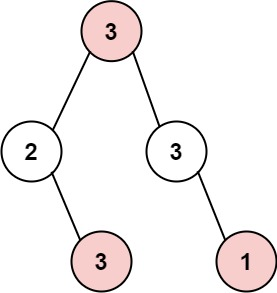

- 输入: root = [3,2,3,null,3,null,1]
- 输出: 7 
- 解释: 小偷一晚能够盗取的最高金额 3 + 3 + 1 = 7

示例 2:

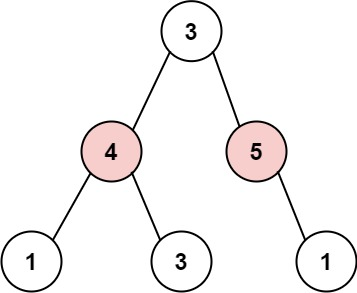

- 输入: root = [3,4,5,1,3,null,1]
- 输出: 9
- 解释: 小偷一晚能够盗取的最高金额 4 + 5 = 9

In [10]:
# Definition for a binary tree node.

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

from typing import Optional

# 这个题目的dp数组长度为2，dp[0]代表不偷当前节点，dp[1]代表偷当前节点，是一种“状态”的概念

class Solution:
    def robTree(self, cur: Optional[TreeNode]):
        if cur is None:
            return [0, 0]
        left = self.robTree(cur.left)
        right = self.robTree(cur.right)
        # 偷cur这个节点，不偷它的子节点
        val1 = cur.val + left[0] + right[0]
        # 不偷cur，偷它的子节点
        val2 = max(left[0], left[1]) + max(right[0], right[1])
        return [val2, val1]

    def rob(self, root: Optional[TreeNode]) -> int:
        res = self.robTree(root)
        return max(res[0], res[1])

# [Leetcode121-买卖股票的最佳时机](https://leetcode.cn/problems/best-time-to-buy-and-sell-stock/description/)

给定一个数组 prices ，它的第 i 个元素 prices[i] 表示一支给定股票第 i 天的价格。

你只能选择某一天买入这只股票，并选择在未来的某一个不同的日子卖出该股票。设计一个算法来计算你所能获取的最大利润。

返回你可以从这笔交易中获取的最大利润。如果你不能获取任何利润，返回 0 。

示例 1：
- 输入：[7,1,5,3,6,4]
- 输出：5
- 解释：在第 2 天（股票价格 = 1）的时候买入，在第 5 天（股票价格 = 6）的时候卖出，最大利润 = 6-1 = 5 。注意利润不能是 7-1 = 6, 因为卖出价格需要大于买入价格；同时，你不能在买入前卖出股票。

示例 2：
- 输入：prices = [7,6,4,3,1]
- 输出：0
- 解释：在这种情况下, 没有交易完成, 所以最大利润为 0。
 

提示：
- 1 <= prices.length <= 10^5
- 0 <= prices[i] <= 10^4

In [ ]:
from typing import List
# 贪心
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        lowest = 2 ** 64 - 1
        n = len(prices)
        res = 0
        for i in range(n):
            lowest = min(lowest, prices[i])
            res = max(res, prices[i] - lowest)
        return res
        

In [ ]:
from typing import List
# 动态规划
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        n = len(prices)
        if n == 0:
            return 0
        
        dp = [[0] * 2 for _ in range(n)]

        # 这里的dp[i][0]表示持有下标为i的股票，dp[i][1]表示不持有下标为i的股票

        dp[0][0] -= prices[0]
        dp[0][1] = 0

        for i in range(1, n):
            # dp[i][0]表示持有下标为i的股票，可以从前一个状态递推出来
            dp[i][0] = max(dp[i - 1][0], -prices[i])
            # dp[i][1]表示不持有下标为i的股票，可以从前一个状态推出来
            dp[i][1] = max(dp[i - 1][1], prices[i] + dp[i - 1][0])

        return dp[n - 1][1]


# [Leetcode122-买卖股票的最佳时机II](https://leetcode.cn/problems/best-time-to-buy-and-sell-stock-ii/description/)
给你一个整数数组 prices ，其中 prices[i] 表示某支股票第 i 天的价格。

在每一天，你可以决定是否购买和/或出售股票。你在任何时候最多只能持有一股股票。你也可以先购买，然后在同一天出售。

返回你能获得的最大利润 。

示例 1：
- 输入：prices = [7,1,5,3,6,4]
- 输出：7
- 解释：在第 2 天（股票价格 = 1）的时候买入，在第 3 天（股票价格 = 5）的时候卖出, 这笔交易所能获得利润 = 5 - 1 = 4。随后，在第 4 天（股票价格 = 3）的时候买入，在第 5 天（股票价格 = 6）的时候卖出, 这笔交易所能获得利润 = 6 - 3 = 3。最大总利润为 4 + 3 = 7 。

示例 2：
- 输入：prices = [1,2,3,4,5]
- 输出：4
- 解释：在第 1 天（股票价格 = 1）的时候买入，在第 5 天 （股票价格 = 5）的时候卖出, 这笔交易所能获得利润 = 5 - 1 = 4。最大总利润为 4 。

示例 3：
- 输入：prices = [7,6,4,3,1]
- 输出：0
- 解释：在这种情况下, 交易无法获得正利润，所以不参与交易可以获得最大利润，最大利润为 0。
 

提示：
- 1 <= prices.length <= 3 * 10^4
- 0 <= prices[i] <= 10^4

In [ ]:
# 贪心
# 局部最优：收集每天的正利润，全局最优：求得最大利润

from typing import List

class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        res = 0
        n = len(prices)
        for i in range(1, n):
            res += max(prices[i] - prices[i - 1], 0)
        return res        

In [ ]:
# 动态规划

from typing import List

class Solution:
    def maxProfit(self, prices: List[int]) -> int:

        # 这里的状态表示依旧和上一题一样，唯一的区别就是推到dp[i][0]的时候
        n = len(prices)
        dp = [[0] * 2 for _ in range(n)]

        dp[0][0] = 0 - prices[0]
        dp[0][1] = 0

        for i in range(1, n):
            dp[i][0] = max(dp[i - 1][0], dp[i - 1][1] - prices[i])
            dp[i][1] = max(dp[i - 1][1], dp[i - 1][0] + prices[i])

        return dp[n - 1][1]

# [Leetcode123-买卖股票的最佳时机III](https://leetcode.cn/problems/best-time-to-buy-and-sell-stock-iii/description/)

给定一个数组，它的第 i 个元素是一支给定的股票在第 i 天的价格。

设计一个算法来计算你所能获取的最大利润。你最多可以完成两笔交易。

注意：你不能同时参与多笔交易（你必须在再次购买前出售掉之前的股票）。

示例 1:
- 输入：prices = [3,3,5,0,0,3,1,4]
- 输出：6
- 解释：在第 4 天（股票价格 = 0）的时候买入，在第 6 天（股票价格 = 3）的时候卖出，这笔交易所能获得利润 = 3-0 = 3 。随后，在第 7 天（股票价格 = 1）的时候买入，在第 8 天 （股票价格 = 4）的时候卖出，这笔交易所能获得利润 = 4-1 = 3 。

示例 2：
- 输入：prices = [1,2,3,4,5]
- 输出：4
- 解释：在第 1 天（股票价格 = 1）的时候买入，在第 5 天 （股票价格 = 5）的时候卖出, 这笔交易所能获得利润 = 5-1 = 4 。注意你不能在第 1 天和第 2 天接连购买股票，之后再将它们卖出。因为这样属于同时参与了多笔交易，你必须在再次购买前出售掉之前的股票。

示例 3：
- 输入：prices = [7,6,4,3,1] 
- 输出：0 
- 解释：在这个情况下, 没有交易完成, 所以最大利润为 0。

示例 4：
- 输入：prices = [1]
- 输出：0

In [ ]:
# 动态规划

'''
dp[i][0]表示不操作
dp[i][1]表示第一次持有
dp[i][2]表示第一次不持有
dp[i][3]表示第二次持有
dp[i][4]表示第二次不持有
'''

from typing import List

class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        n = len(prices)
        dp = [[0] * 5 for _ in range(n)]

        dp[0][0] = 0
        dp[0][1] = 0 - prices[0]
        dp[0][2] = 0
        dp[0][3] = 0 - prices[0]
        dp[0][4] = 0

        for i in range(1, n):
            dp[i][1] = max(dp[i - 1][1], dp[i - 1][0] - prices[i])
            dp[i][2] = max(dp[i - 1][2], dp[i - 1][1] + prices[i])
            dp[i][3] = max(dp[i - 1][3], dp[i - 1][2] - prices[i])
            dp[i][4] = max(dp[i - 1][4], dp[i - 1][3] + prices[i])

        return dp[n - 1][4]


# [Leetcode188-买卖股票的最佳时机IV](https://leetcode.cn/problems/best-time-to-buy-and-sell-stock-iv/description/)

给定一个整数数组 prices ，它的第 i 个元素 prices[i] 是一支给定的股票在第 i 天的价格。
设计一个算法来计算你所能获取的最大利润。你最多可以完成 k 笔交易。
注意：你不能同时参与多笔交易（你必须在再次购买前出售掉之前的股票）。

示例 1：
- 输入：k = 2, prices = [2,4,1]
- 输出：2 
- 解释：在第 1 天 (股票价格 = 2) 的时候买入，在第 2 天 (股票价格 = 4) 的时候卖出，这笔交易所能获得利润 = 4-2 = 2。

示例 2：

- 输入：k = 2, prices = [3,2,6,5,0,3]
- 输出：7 
- 解释：在第 2 天 (股票价格 = 2) 的时候买入，在第 3 天 (股票价格 = 6) 的时候卖出, 这笔交易所能获得利润 = 6-2 = 4。随后，在第 5 天 (股票价格 = 0) 的时候买入，在第 6 天 (股票价格 = 3) 的时候卖出, 这笔交易所能获得利润 = 3-0 = 3 。

提示：
- 0 <= k <= 100
- 0 <= prices.length <= 1000
- 0 <= prices[i] <= 1000

In [ ]:
class Solution:
    def maxProfit(self, k: int, prices: List[int]) -> int:
        n = len(prices)
        if n == 0:
            return 0
        dp = [[0] * (2 * k + 1) for _ in range(n)]
        for j in range(1, 2 * k, 2):
            dp[0][j] = 0 - prices[0]
        for i in range(1, n):
            for j in range(0, 2 * k - 1, 2):
                dp[i][j + 1] = max(dp[i - 1][j + 1], dp[i - 1][j] - prices[i])
                dp[i][j + 2] = max(dp[i - 1][j + 2], dp[i - 1][j + 1] + prices[i])
        return dp[-1][2 * k]




# [Leetcode309-最佳买卖股票时机含冷冻期](https://leetcode.cn/problems/best-time-to-buy-and-sell-stock-with-cooldown/description/)

给定一个整数数组，其中第 i 个元素代表了第 i 天的股票价格 。
设计一个算法计算出最大利润。在满足以下约束条件下，你可以尽可能地完成更多的交易（多次买卖一支股票）:
你不能同时参与多笔交易（你必须在再次购买前出售掉之前的股票）。
卖出股票后，你无法在第二天买入股票 (即冷冻期为 1 天)。

示例:
- 输入: [1,2,3,0,2]
- 输出: 3
- 解释: 对应的交易状态为: [买入, 卖出, 冷冻期, 买入, 卖出]


In [ ]:
from typing import List

class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        n = len(prices)
        if n == 0:
            return 0
        # 初始化动态规划数组，这里有四个状态：
        # 持有股票、不持有股票且处于冷冻期、不持有股票且不处于冷冻期、不持有股票且当前卖出后处于冷冻期
        dp = [[0] * 4 for _ in range(n)]
        dp[0][0] = 0 - prices[0]
        for i in range(1, n):
            dp[i][0] = max(dp[i - 1][0], dp[i - 1][3] - prices[i], dp[i - 1][1] - prices[i])
            dp[i][1] = max(dp[i - 1][1], dp[i - 1][3])
            dp[i][2] = dp[i - 1][0] + prices[i]
            dp[i][3] = dp[i - 1][2]
        return max(dp[n - 1][3], dp[n - 1][2], dp[n - 1][1])




# [Leetcode714-买卖股票的最佳时机含手续费](https://leetcode.cn/problems/best-time-to-buy-and-sell-stock-with-transaction-fee/)

给定一个整数数组 prices，其中第 i 个元素代表了第 i 天的股票价格 ；非负整数 fee 代表了交易股票的手续费用。

你可以无限次地完成交易，但是你每笔交易都需要付手续费。如果你已经购买了一个股票，在卖出它之前你就不能再继续购买股票了。

返回获得利润的最大值。

注意：这里的一笔交易指买入持有并卖出股票的整个过程，每笔交易你只需要为支付一次手续费。

示例 1:
- 输入: prices = [1, 3, 2, 8, 4, 9], fee = 2
- 输出: 8

解释: 能够达到的最大利润:
- 在此处买入 prices[0] = 1
- 在此处卖出 prices[3] = 8
- 在此处买入 prices[4] = 4
- 在此处卖出 prices[5] = 9
- 总利润: ((8 - 1) - 2) + ((9 - 4) - 2) = 8

注意:
- 0 < prices.length <= 50000
- 0 < prices[i] < 50000
- 0 <= fee < 50000

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int], fee: int) -> int:
        # 这里继续是使用dp[i][0]表示第i天持有股票所获得的最大现金，dp[i][1]表示第i天不持有股票所获得的最大现金
        n = len(prices)
        if n == 0:
            return 0
        dp = [[0] * 2 for _ in range(n)]
        dp[0][0] = 0 - prices[0]
        for i in range(1, n):
            dp[i][0] = max(dp[i - 1][0], dp[i - 1][1] - prices[i])
            dp[i][1] = max(dp[i - 1][1], dp[i - 1][0] + prices[i] - fee)
        return max(dp[-1][1], dp[-1][0])

# [Leetcode300-最长递增子序列](https://leetcode.cn/problems/longest-increasing-subsequence/description/)

给你一个整数数组 nums ，找到其中最长严格递增子序列的长度。

子序列是由数组派生而来的序列，删除（或不删除）数组中的元素而不改变其余元素的顺序。例如，[3,6,2,7] 是数组 [0,3,1,6,2,2,7] 的子序列。

示例 1：
- 输入：nums = [10,9,2,5,3,7,101,18]
- 输出：4
- 解释：最长递增子序列是 [2,3,7,101]，因此长度为 4 。

示例 2：
- 输入：nums = [0,1,0,3,2,3]
- 输出：4

示例 3：
- 输入：nums = [7,7,7,7,7,7,7]
- 输出：1

提示：
- 1 <= nums.length <= 2500
- -10^4 <= nums[i] <= 10^4

In [ ]:
class Solution:
    def lengthOfLIS(self, nums: List[int]) -> int:
        if nums is None:
            return 0
        n = len(nums)
        dp = [1] * n
        for i in range(1, n):
            for j in range(i):
                if nums[i] > nums[j]:
                    dp[i] = max(dp[i], dp[j] + 1)
        return max(dp)                    

# [Leetcode674-最长连续递增序列](https://leetcode.cn/problems/longest-continuous-increasing-subsequence/description/)

给定一个未经排序的整数数组，找到最长且连续递增的子序列，并返回该序列的长度。
连续递增的子序列 可以由两个下标 l 和 r（l < r）确定，如果对于每个 l <= i < r，都有 nums[i] < nums[i + 1] ，那么子序列 [nums[l], nums[l + 1], ..., nums[r - 1], nums[r]] 就是连续递增子序列。

示例 1：
- 输入：nums = [1,3,5,4,7]
- 输出：3
- 解释：最长连续递增序列是 [1,3,5], 长度为3。尽管 [1,3,5,7] 也是升序的子序列, 但它不是连续的，因为 5 和 7 在原数组里被 4 隔开。

示例 2：
- 输入：nums = [2,2,2,2,2]
- 输出：1
- 解释：最长连续递增序列是 [2], 长度为1。

提示：
- 0 <= nums.length <= 10^4
- -10^9 <= nums[i] <= 10^9

In [ ]:
class Solution:
    def findLengthOfLCIS(self, nums: List[int]) -> int:
        n = len(nums)
        if n == 0:
            return 0
        if n == 1:
            return 1
        dp = [1] * n
        for i in range(1, n):
            if nums[i] > nums[i - 1]:
                dp[i] = dp[i - 1] + 1
        return max(dp)        

# [Leetcode718-最长重复子数组](https://leetcode.cn/problems/maximum-length-of-repeated-subarray/)

给两个整数数组 A 和 B ，返回两个数组中公共的、长度最长的子数组的长度。

示例：
- 输入：
A: [1,2,3,2,1]
B: [3,2,1,4,7]
- 输出：3
- 解释：长度最长的公共子数组是 [3, 2, 1] 。

提示：
- 1 <= len(A), len(B) <= 1000
- 0 <= A[i], B[i] < 100

In [ ]:
class Solution:
    def findLength(self, nums1: List[int], nums2: List[int]) -> int:
        n1 = len(nums1)
        n2 = len(nums2)
        dp = [[0] * (n2 + 1) for _ in range(n1 + 1)]
        for i in range(1, n1 + 1):
            for j in range(1, n2 + 1):
                if nums1[i - 1] == nums2[j - 1]:
                    dp[i][j] = dp[i - 1][j - 1] + 1
        return max(max(row) for row in dp)       
     

# [Leetcode1143-最长公共子序列](https://leetcode.cn/problems/longest-common-subsequence/description/)

给定两个字符串 text1 和 text2，返回这两个字符串的最长公共子序列的长度。

一个字符串的 子序列 是指这样一个新的字符串：它是由原字符串在不改变字符的相对顺序的情况下删除某些字符（也可以不删除任何字符）后组成的新字符串。

例如，"ace" 是 "abcde" 的子序列，但 "aec" 不是 "abcde" 的子序列。两个字符串的「公共子序列」是这两个字符串所共同拥有的子序列。

若这两个字符串没有公共子序列，则返回 0。

示例 1:
- 输入：text1 = "abcde", text2 = "ace"
- 输出：3
- 解释：最长公共子序列是 "ace"，它的长度为 3。

示例 2:
- 输入：text1 = "abc", text2 = "abc"
- 输出：3
- 解释：最长公共子序列是 "abc"，它的长度为 3。

示例 3:
- 输入：text1 = "abc", text2 = "def"
- 输出：0
- 解释：两个字符串没有公共子序列，返回 0。

提示:
- 1 <= text1.length <= 1000
- 1 <= text2.length <= 1000 
- 输入的字符串只含有小写英文字符。

In [ ]:
class Solution:
    def longestCommonSubsequence(self, text1: str, text2: str) -> int:
        n1 = len(text1)
        n2 = len(text2)
        dp = [[0] * (n2 + 1) for _ in range(n1 + 1)]
        for i in range(1, n1 + 1):
            for j in range(1, n2 + 1):
                if text1[i - 1] == text2[j - 1]:
                    dp[i][j] = dp[i - 1][j - 1] + 1
                else:
                    dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
        return max(max(row) for row in dp)

# [Leetcode1035-不相交的线](https://leetcode.cn/problems/uncrossed-lines/description/)

在两条独立的水平线上按给定的顺序写下 nums1 和 nums2 中的整数。

现在，可以绘制一些连接两个数字 nums1[i] 和 nums2[j] 的直线，这些直线需要同时满足：
- nums1[i] == nums2[j]
- 且绘制的直线不与任何其他连线（非水平线）相交。
请注意，连线即使在端点也不能相交：每个数字只能属于一条连线。

以这种方法绘制线条，并返回可以绘制的最大连线数。

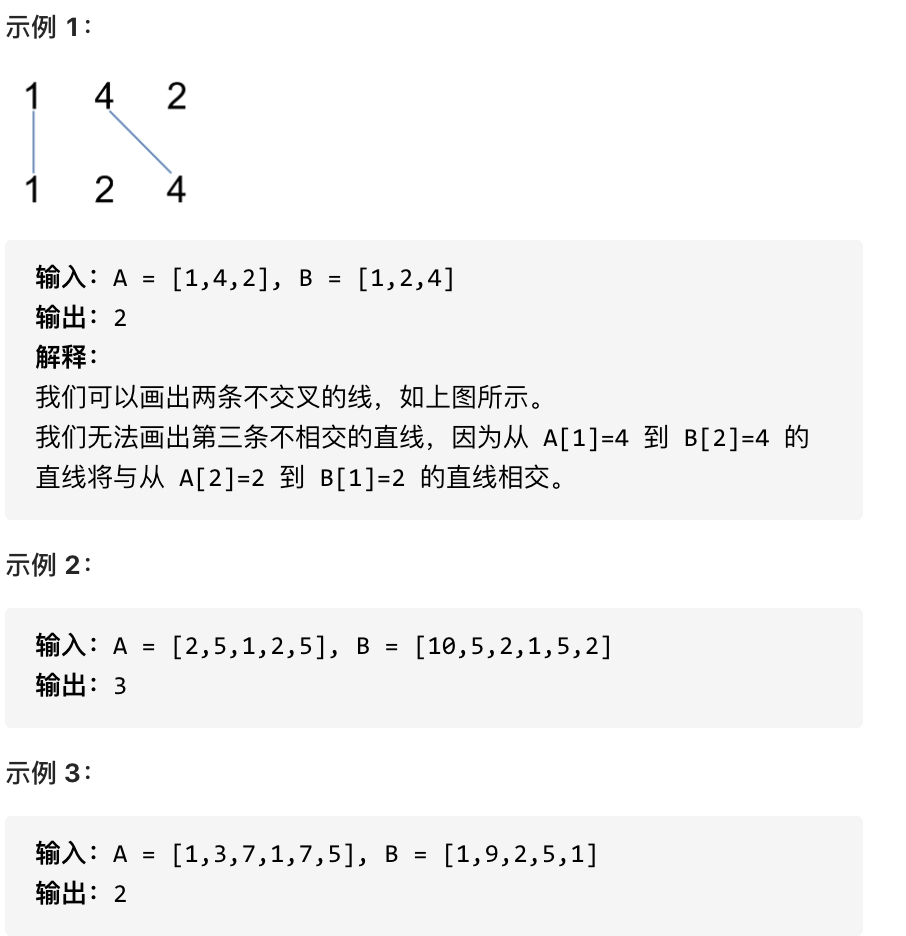

In [ ]:
class Solution:
    def maxUncrossedLines(self, nums1: List[int], nums2: List[int]) -> int:
        # 这个题目就是求最长公共子序列
        n1 = len(nums1)
        n2 = len(nums2)
        dp = [[0] * (n2 + 1) for _ in range(n1 + 1)]
        for i in range(1, n1 + 1):
            for j in range(1, n2 + 1):
                if nums1[i - 1] == nums2[j - 1]:
                    dp[i][j] = dp[i - 1][j - 1] + 1
                else:
                    dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
        return max(max(row) for row in dp)

# [Leetcode53-最大子数组和](https://leetcode.cn/problems/maximum-subarray/description/)

给定一个整数数组 nums ，找到一个具有最大和的连续子数组（子数组最少包含一个元素），返回其最大和。

示例:
- 输入: [-2,1,-3,4,-1,2,1,-5,4]
- 输出: 6
- 解释: 连续子数组 [4,-1,2,1] 的和最大，为 6。

In [ ]:
class Solution:
    def maxSubArray(self, nums: List[int]) -> int:
        # dp[i]表示以nums[i]为结尾的子数组的最大和
        n = len(nums)
        if n == 0:
            return 0
        if n == 1:
            return nums[0]
        dp = [0] * n
        dp[0] = nums[0]
        for i in range(n):
            dp[i] = max(dp[i - 1] + nums[i], nums[i])
        return max(dp)


# [Leetcode392-判断子序列](https://leetcode.cn/problems/is-subsequence/description/)

给定字符串 s 和 t ，判断 s 是否为 t 的子序列。

字符串的一个子序列是原始字符串删除一些（也可以不删除）字符而不改变剩余字符相对位置形成的新字符串。（例如，"ace"是"abcde"的一个子序列，而"aec"不是）。

示例 1：
- 输入：s = "abc", t = "ahbgdc"
- 输出：true

示例 2：
- 输入：s = "axc", t = "ahbgdc"
- 输出：false

提示：
- 0 <= s.length <= 100
- 0 <= t.length <= 10^4
- 两个字符串都只由小写字符组成。

In [ ]:
class Solution:
    def isSubsequence(self, s: str, t: str) -> bool:
        # 这里其实是先求最长不连续的子序列，然后再判断长度即可
        n1 = len(s)
        n2 = len(t)
        dp = [[0] * (n2 + 1) for _ in range(n1 + 1)]
        for i in range(1, n1 + 1):
            for j in range(1, n2 + 1):
                if s[i - 1] == t[j - 1]:
                    dp[i][j] = dp[i - 1][j - 1] + 1
                else:
                    dp[i][j] = dp[i][j - 1]
        return n1 == dp[-1][-1]